<a href="https://colab.research.google.com/github/muhammadessam02/House-Price-Prediction-Exploratory-Data-Analysis-Feature-Engineering-and-Model/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

House Price Prediction: Exploratory Data Analysis, Feature Engineering and Model

#### DataSet
      0   date           4600 non-null   object 
      1   price          4600 non-null   float64
      2   bedrooms       4600 non-null   float64
      3   bathrooms      4600 non-null   float64
      4   sqft_living    4600 non-null   int64  
      5   sqft_lot       4600 non-null   int64  
      6   floors         4600 non-null   float64
      7   waterfront     4600 non-null   int64  
      8   view           4600 non-null   int64  
      9   condition      4600 non-null   int64  
      10  sqft_above     4600 non-null   int64  
      11  sqft_basement  4600 non-null   int64  
      12  yr_built       4600 non-null   int64  
      13  yr_renovated   4600 non-null   int64  
      14  street         4600 non-null   object 
      15  city           4600 non-null   object 
      16  statezip       4600 non-null   object 
      17  country        4600 non-null   object 

### Import Required Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.gridspec import GridSpec
import seaborn as sns
from scipy import stats

from sklearn. impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector,make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
import sklearn.metrics as metrics

sns.set()
style.use('fivethirtyeight')
pd.options.mode.chained_assignment = None  # default='warn'

import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [2]:
from google.colab import files
 
 
uploaded = files.upload()

Saving data.csv to data.csv


In [5]:
data = pd.read_csv('data.csv')

### Exploratory Data Analysis and Feature Engineering

In [6]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [7]:
data.shape

(4600, 18)

In [8]:
data.nunique()

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64

- We can see that this dataset doesn't have NaN values

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


<Axes: >

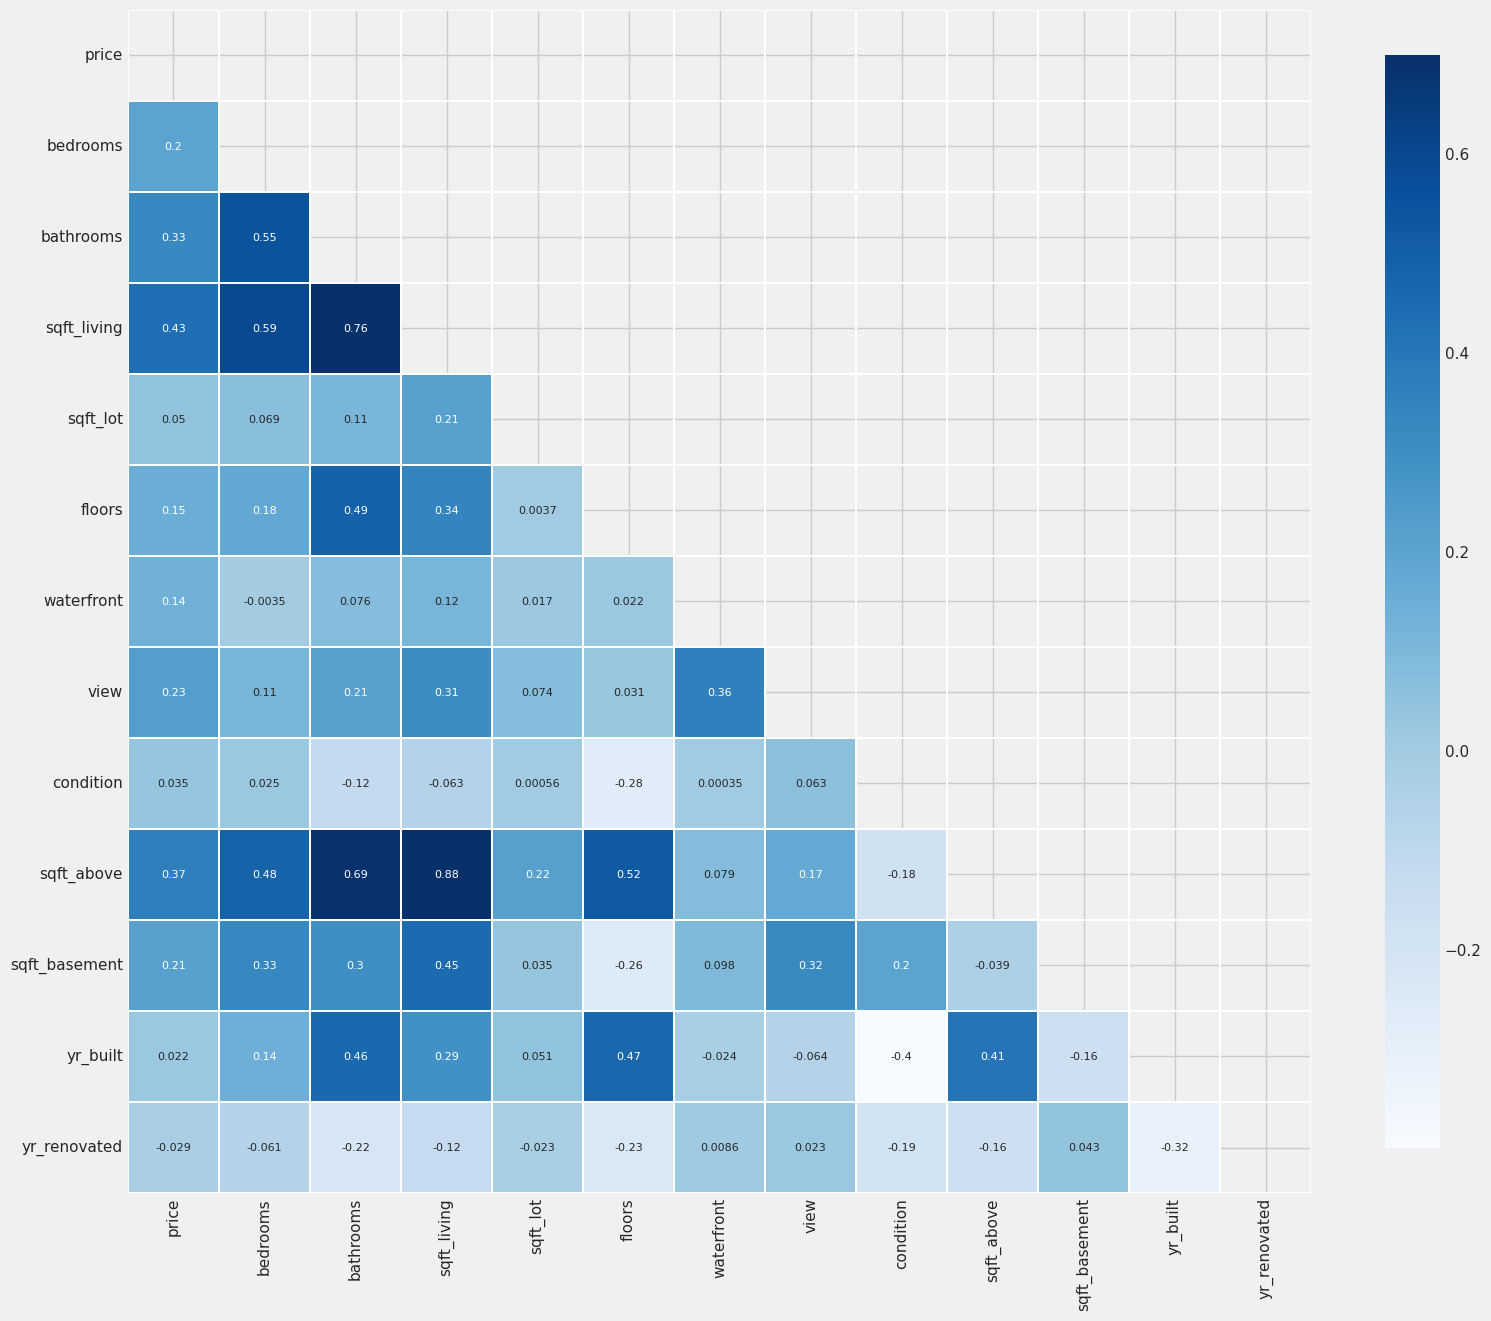

In [15]:
plt.figure(figsize=(17, 15))
corr_data = data.drop(['date'], axis=1)

corr_mask = np.triu(corr_data.corr())
h_map = sns.heatmap(corr_data.corr(), linewidths=0.25,vmax=0.7,square=True,
                    mask=corr_mask, cmap='Blues', linecolor='w',annot=True,
                    annot_kws={"size":8},cbar_kws={"shrink": .9})
h_map



### Price
- Price-Column has got outliers

<Axes: xlabel='price', ylabel='Count'>

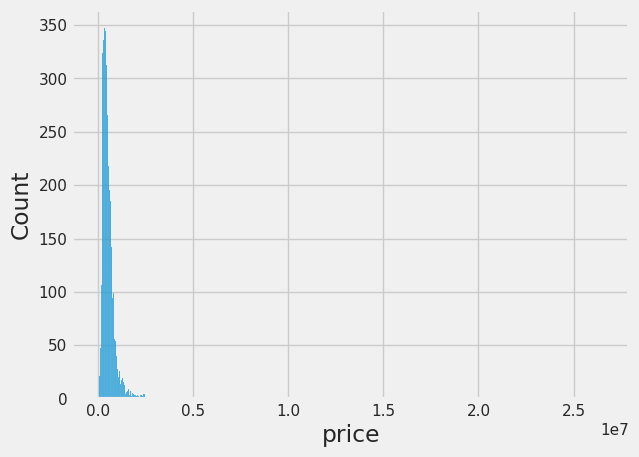

In [16]:
sns.histplot(data.price)

Let's delete it !

In [19]:
def remove_outliers(data, x):
    q25 = np.percentile(data[x], 25)
    q75 = np.percentile(data[x], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = 1, (q75 + cut_off)
    data = data[(data[x] < upper) & (data[x] > lower)]
    print(f"Outliers of {x} are removed\n")
    return data

In [20]:
data = remove_outliers(data, 'price')

Outliers of price are removed



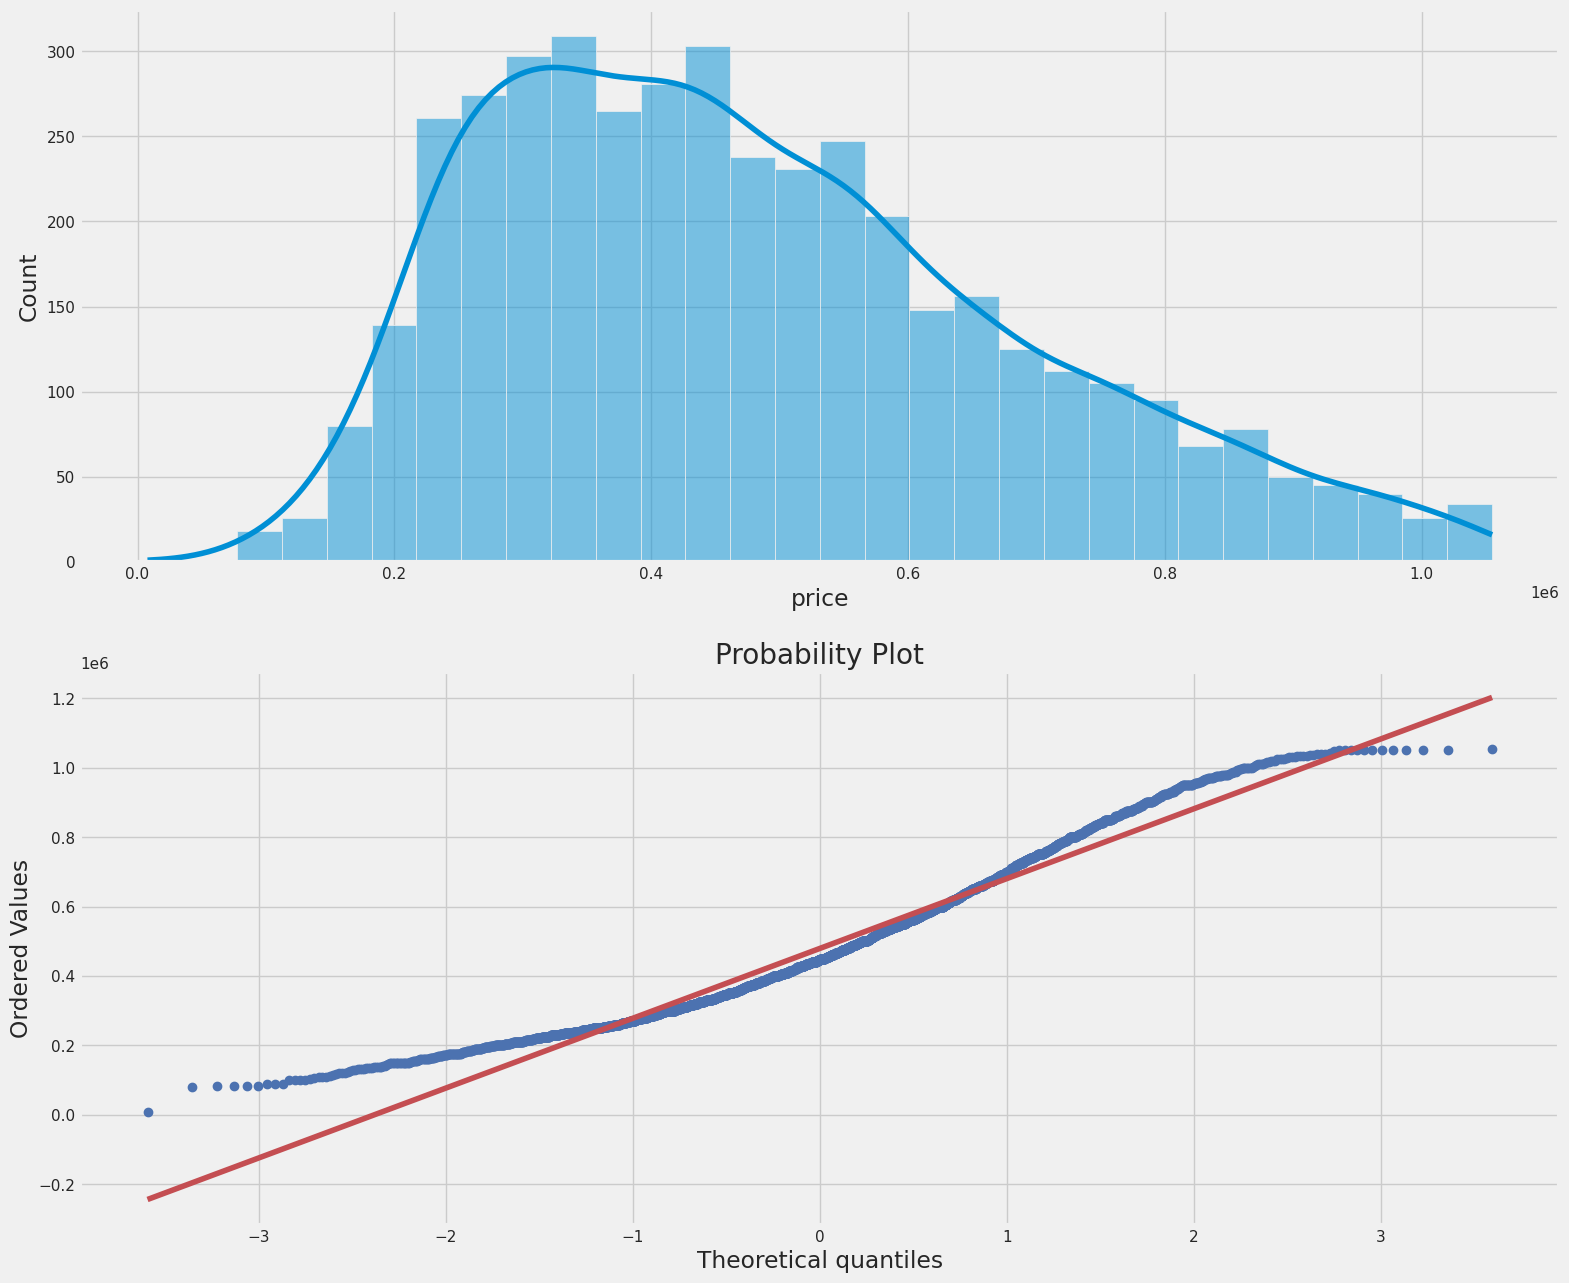

In [21]:
fig = plt.figure(figsize=(17, 15))
grid = GridSpec(ncols=1, nrows=2, figure=fig)

# Histogram
ax1 = fig.add_subplot(grid[0, :])
sns.histplot(data['price'], ax=ax1, kde=True)

# QQ plot
ax2 = fig.add_subplot(grid[1, :])
stats.probplot(data['price'], plot=ax2)
plt.show()

Text(0.5, 0, 'index')

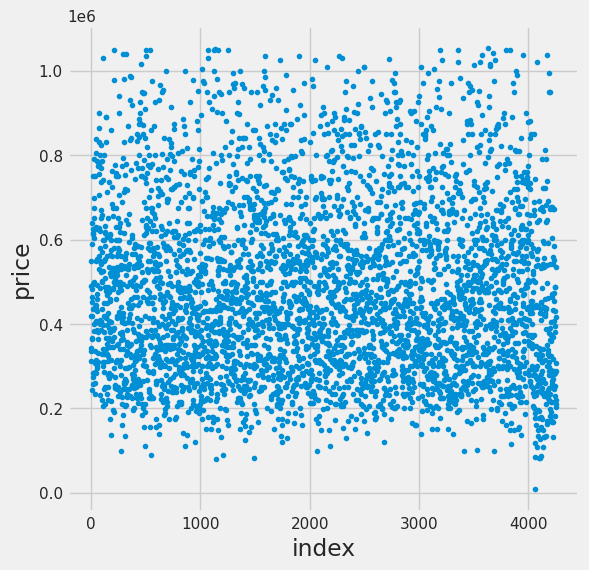

In [22]:
y = np.array(data.price)
plt.figure(figsize=(20, 6))
plt.subplot(131)
plt.plot(range(len(y)), y, '.')
plt.ylabel('price')
plt.xlabel('index')

In [ ]:
data.shape

(4311, 18)

### Date

In [23]:
data.date = pd.to_datetime(data.date)

In [24]:
data.date.dt.year.value_counts()

2014    4255
Name: date, dtype: int64

<Axes: xlabel='date', ylabel='price'>

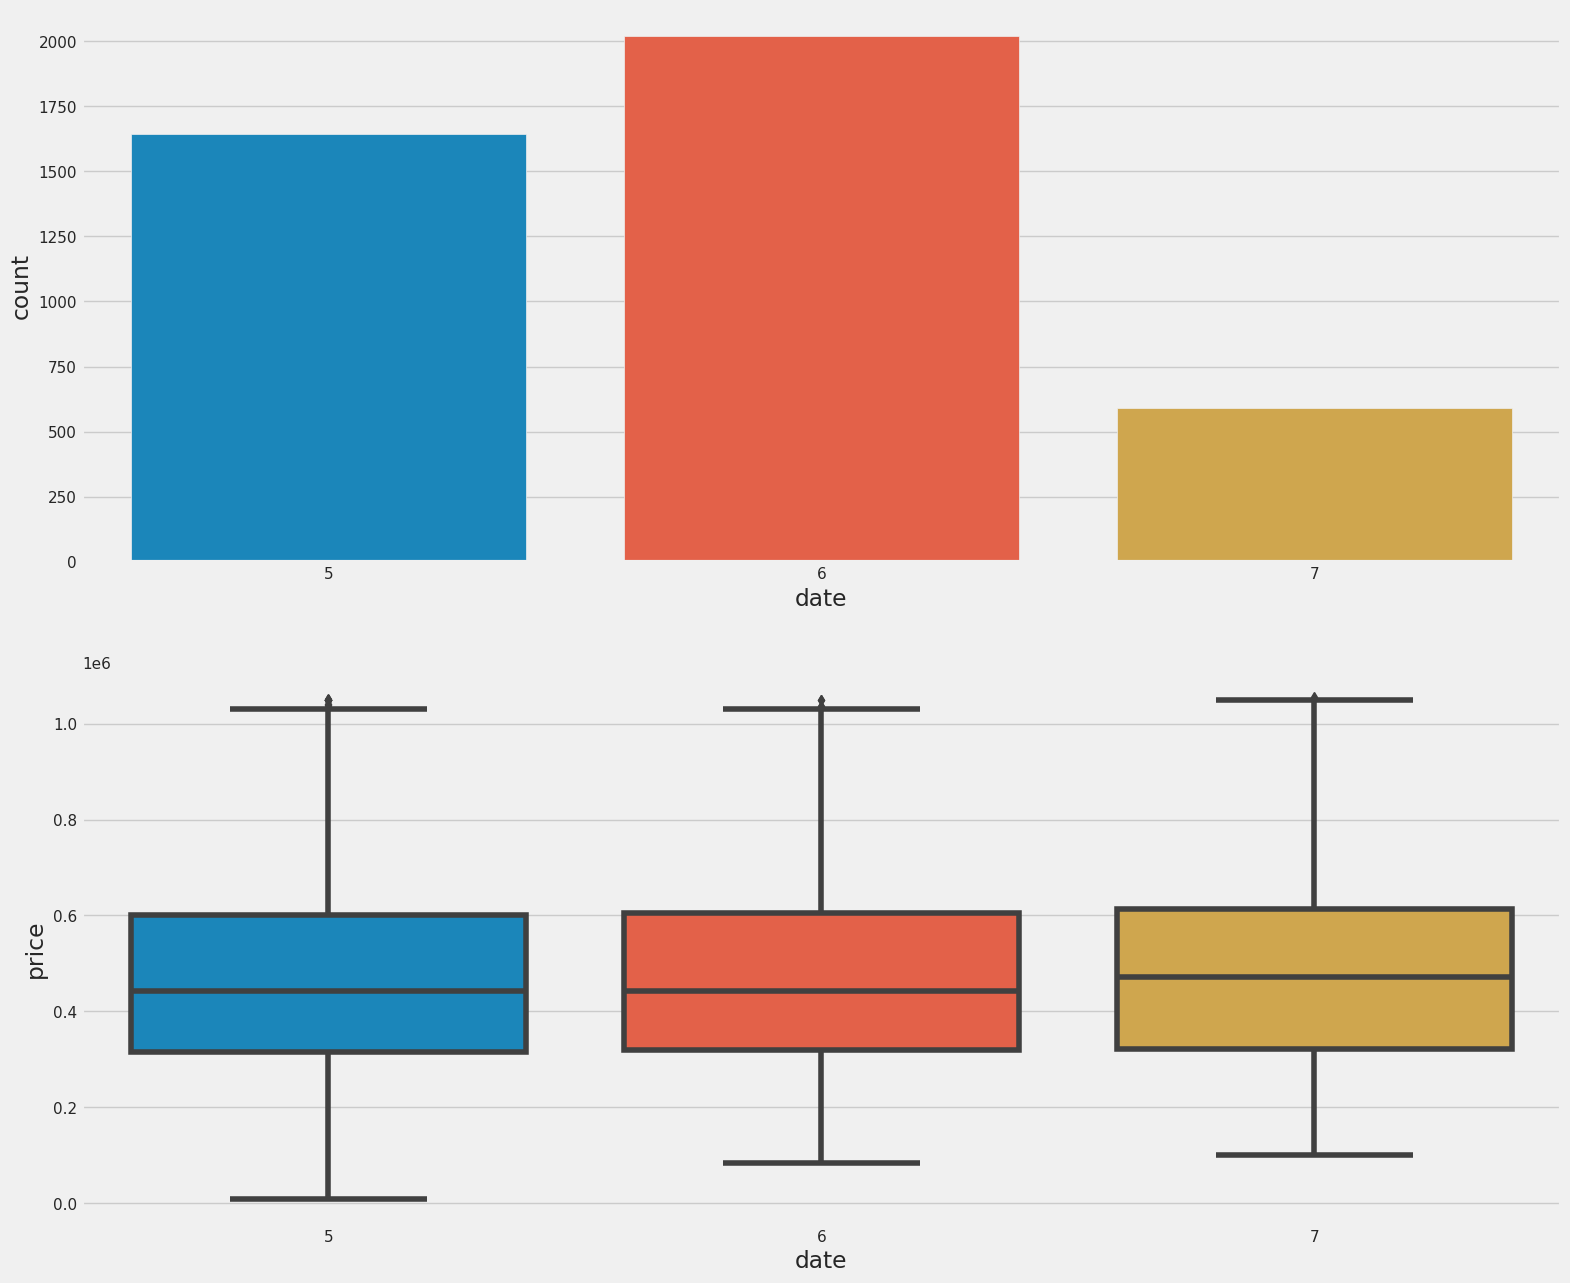

In [25]:
fig = plt.figure(figsize=(17, 15))
grid = GridSpec(ncols=1, nrows=2, figure=fig)

ax1 = fig.add_subplot(grid[0, :])
sns.countplot(x=data.date.dt.month, ax=ax1)

ax2 = fig.add_subplot(grid[1, :])
sns.boxplot(x=data.date.dt.month, y='price', data=data, ax=ax2)

<Axes: xlabel='date', ylabel='count'>

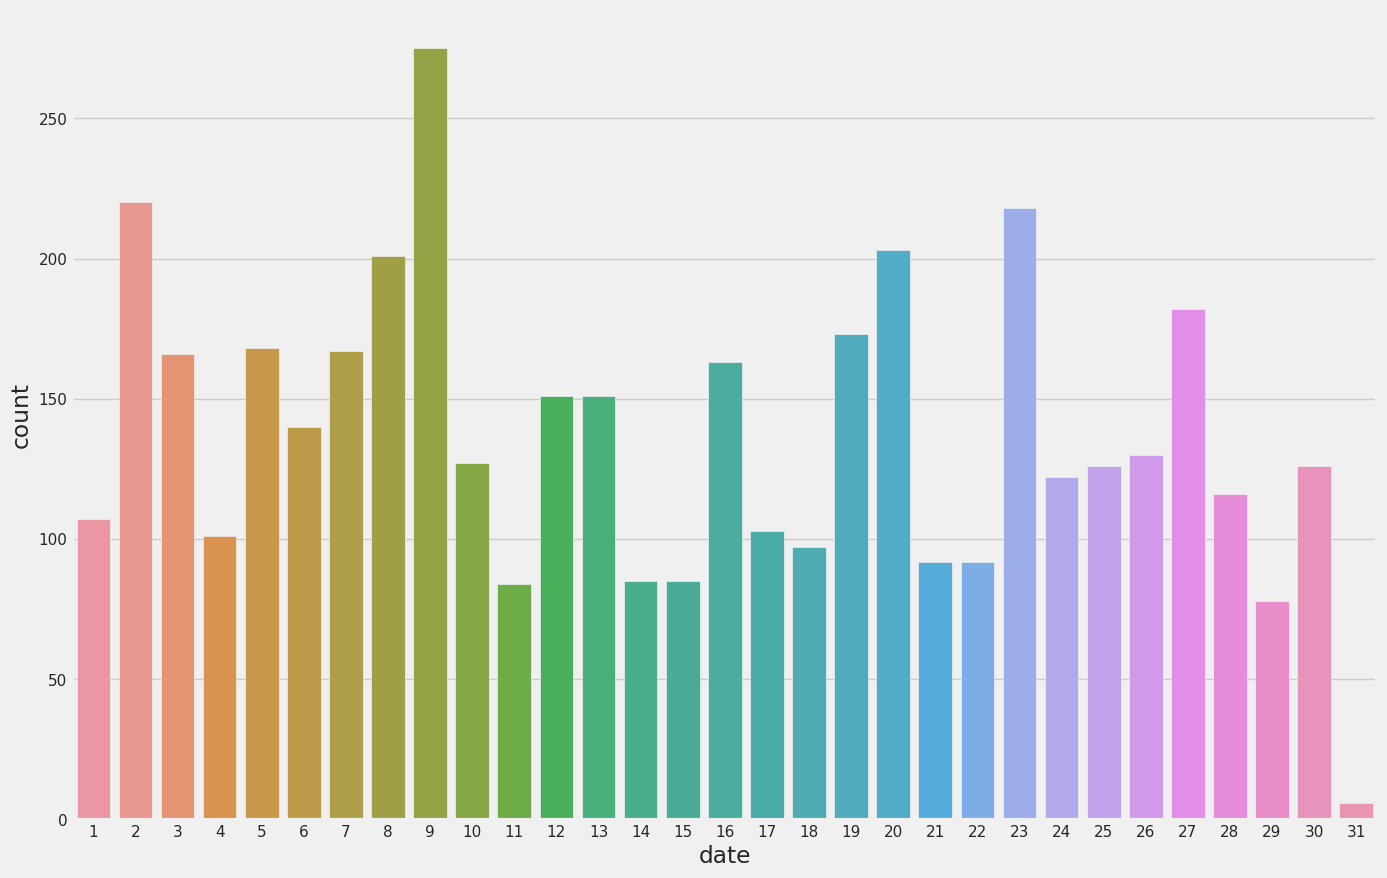

In [26]:
fig = plt.figure(figsize=(15, 10))
sns.countplot(x=data.date.dt.day)

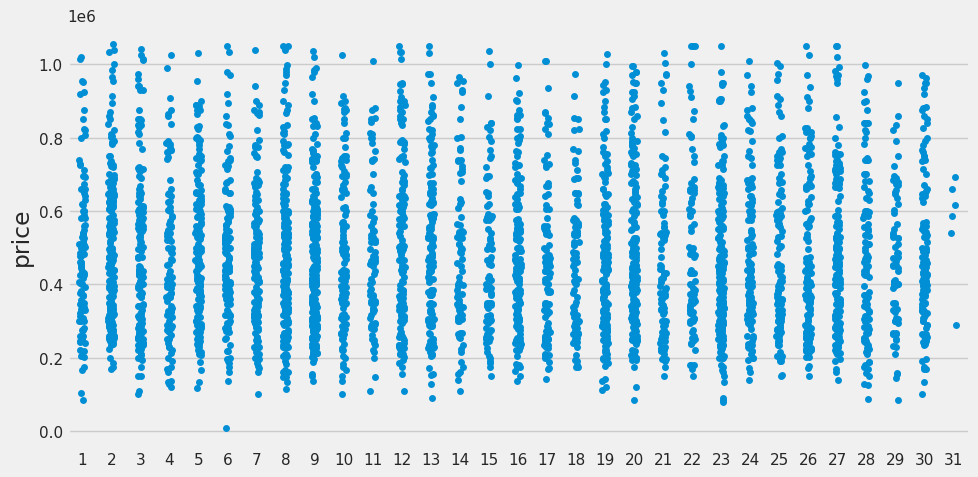

In [27]:
sns.catplot(x=data.date.dt.day.values, y='price', data=data, height=5, aspect=2)

- Deleting Date-column

In [28]:
data.drop('date', axis=1, inplace=True)

In [29]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA


### Bedrooms

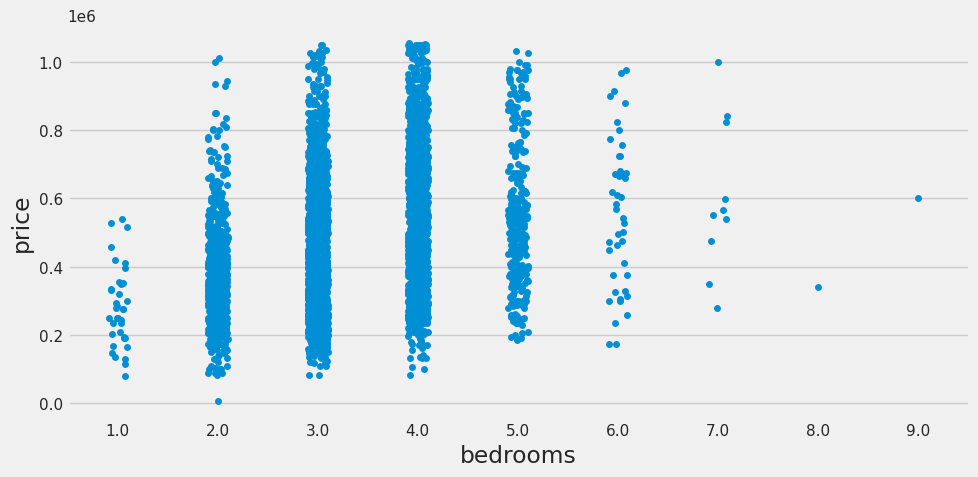

In [30]:
sns.catplot(x='bedrooms', y='price', data=data, height=5, aspect=2)

<Axes: xlabel='bedrooms', ylabel='Count'>

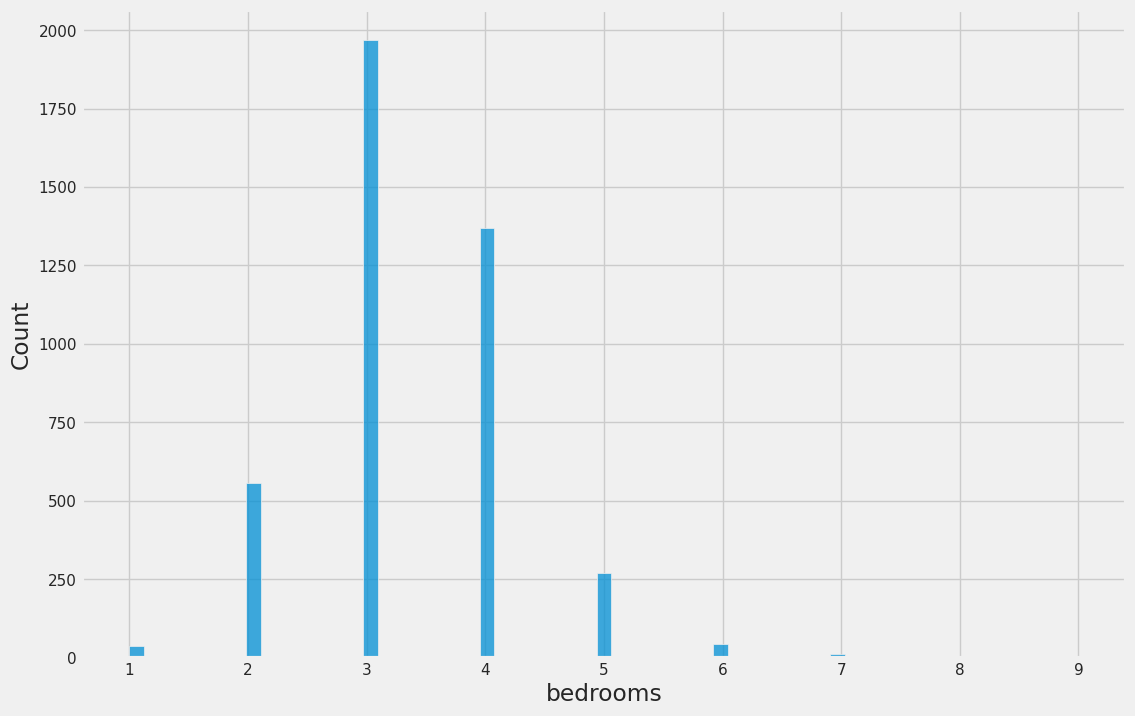

In [31]:
fig = plt.figure(figsize=(12, 8))
sns.histplot(data.bedrooms)

- We can see outliers, when the value >= 7. Let's delete this one

In [32]:
data = data[data.bedrooms < 7]

Text(0, 0.5, 'Amount')

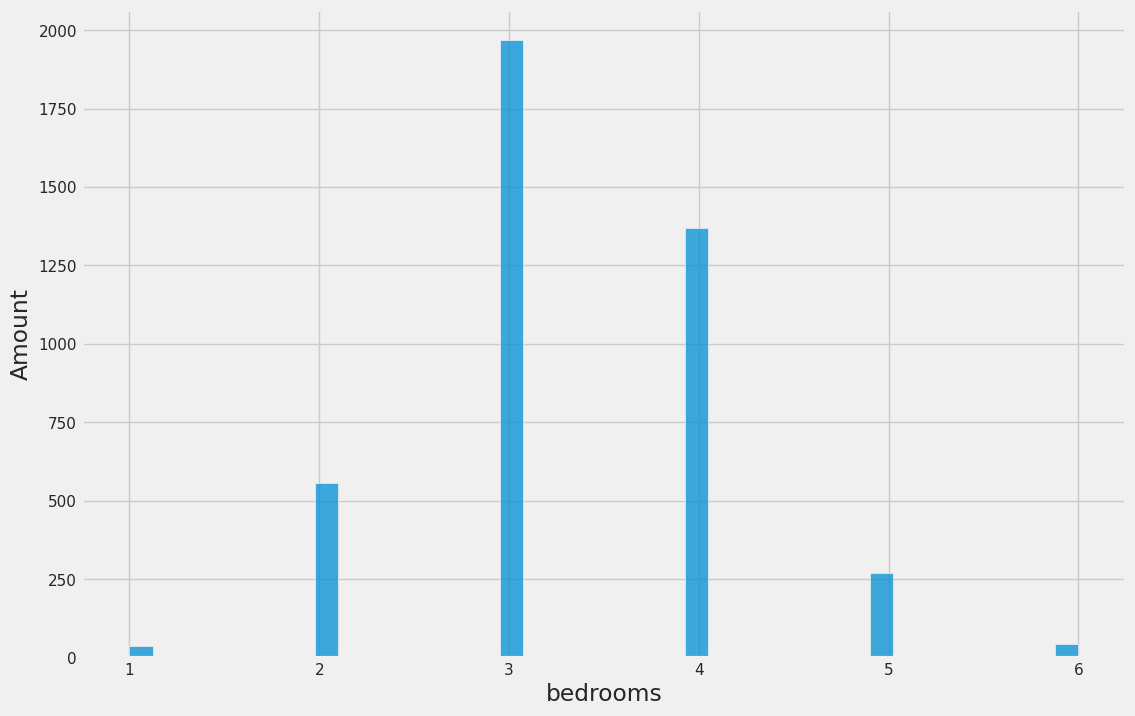

In [33]:
fig = plt.figure(figsize=(12, 8))
sns.histplot(x=data.bedrooms)
plt.ylabel('Amount')

In [34]:
data.shape

(4243, 17)

### Bathrooms

<Axes: xlabel='bathrooms', ylabel='count'>

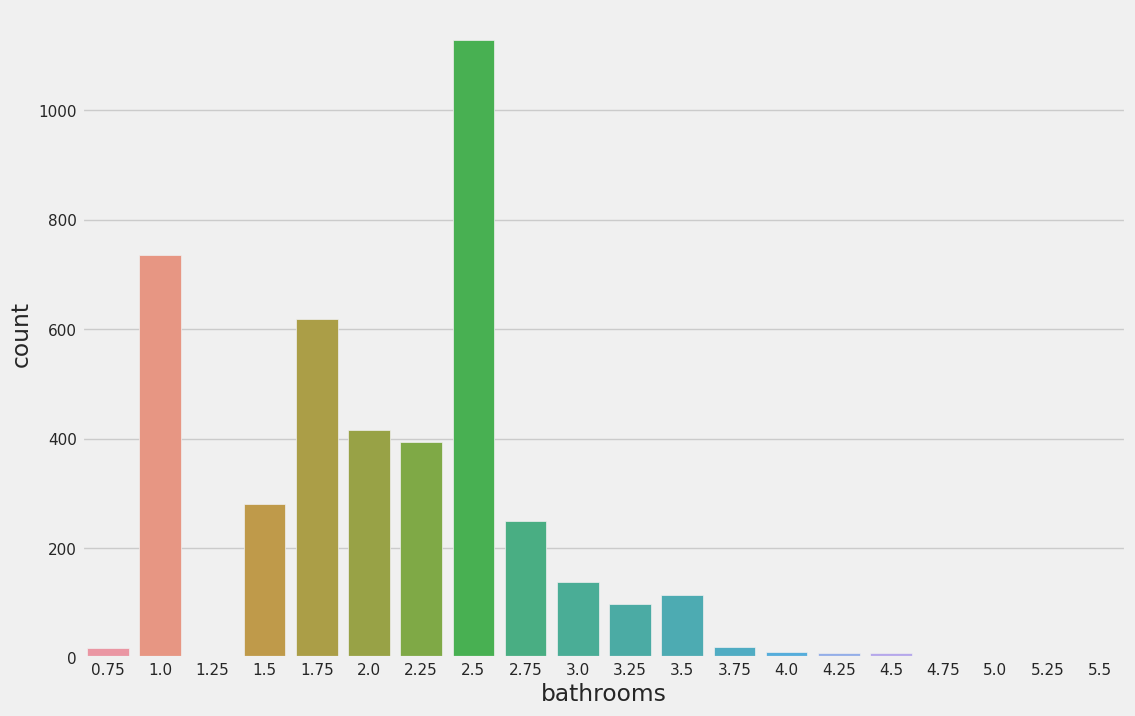

In [35]:
fig = plt.figure(figsize=(12, 8))
sns.countplot(x=data['bathrooms'])

- This attribute has outliers

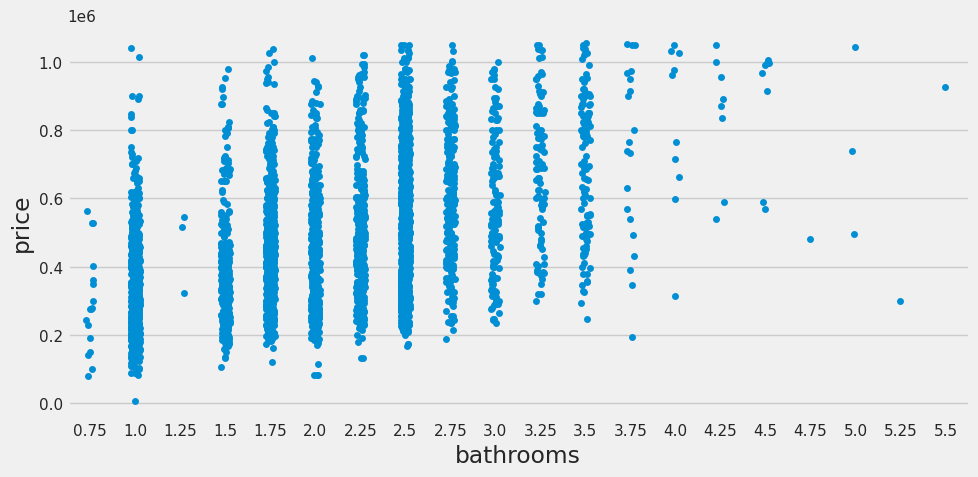

In [36]:
sns.catplot(x='bathrooms', y='price', data=data, height=5, aspect=2)

In [37]:
mask = (data.bathrooms < 3.75)
data = data[mask]
data.bathrooms = data.bathrooms.apply(lambda x: 1 if (x == 0.75)
                                                      or
                                                     (x == 1.25)
                                                  else x)

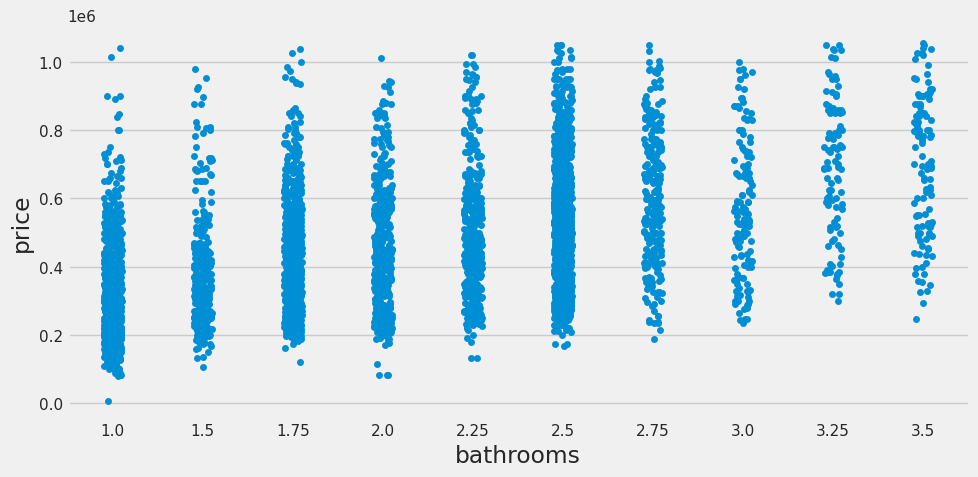

In [38]:
sns.catplot(x='bathrooms', y='price', data=data, height=5, aspect=2)

In [39]:
data.shape

(4191, 17)

### Square footage

In [40]:
sqft_cols = data.columns[data.columns.str.contains('sqft')]
sqft_cols

Index(['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement'], dtype='object')

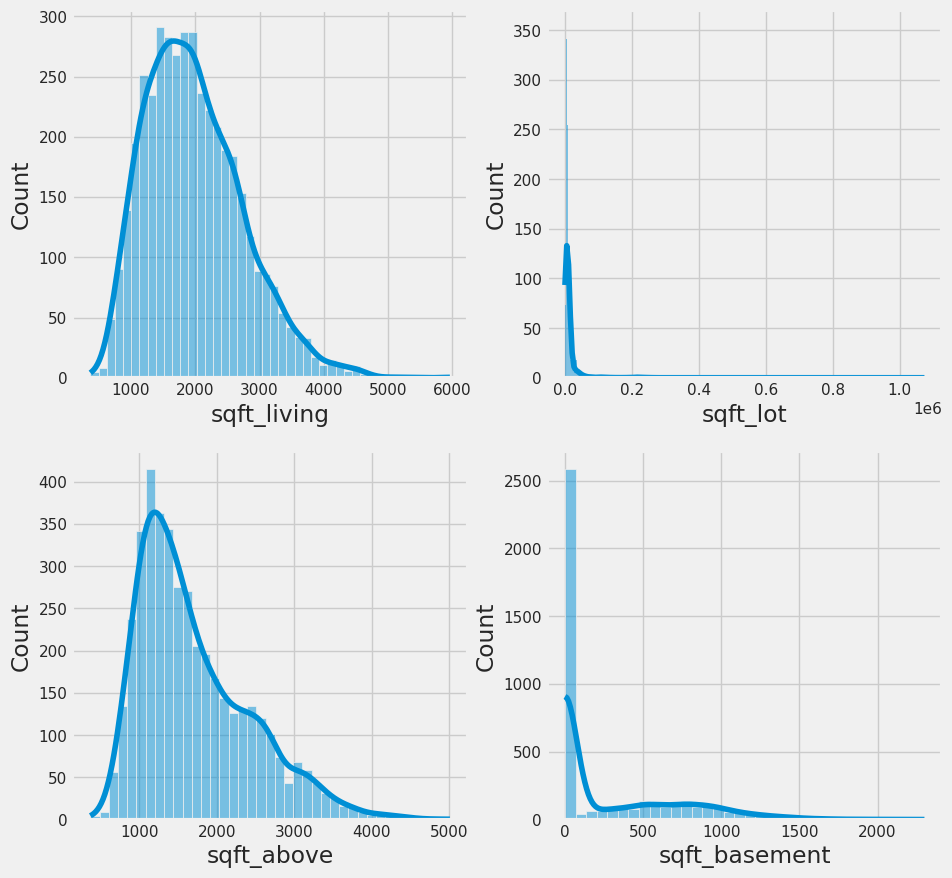

In [41]:
def show_count_plots(data, cols):
    fig = plt.figure(figsize=(10, 10))
    grid = GridSpec(ncols=2,
                    nrows=2, figure=fig)
    for i, name in enumerate(cols):
        ax = fig.add_subplot(grid[i])
        sns.histplot(data[name], kde=True, ax=ax)
    
show_count_plots(data, sqft_cols)

### Floors

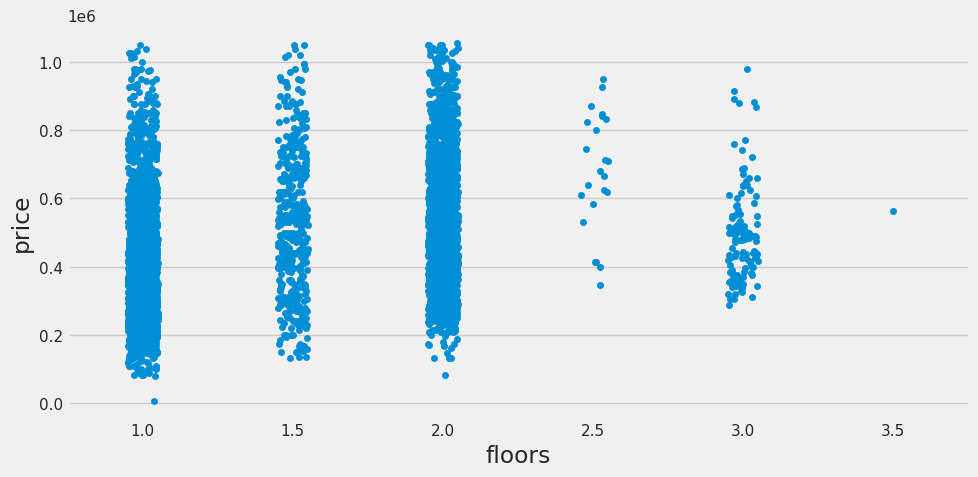

In [42]:
sns.catplot(x='floors', y='price', data=data, height=5, aspect=2)

In [43]:
mask_floors = {1: 1, 1.5:1, 2:2, 2.5:3, 3:3, 3.5:3}
data.floors = data.floors.map(mask_floors)

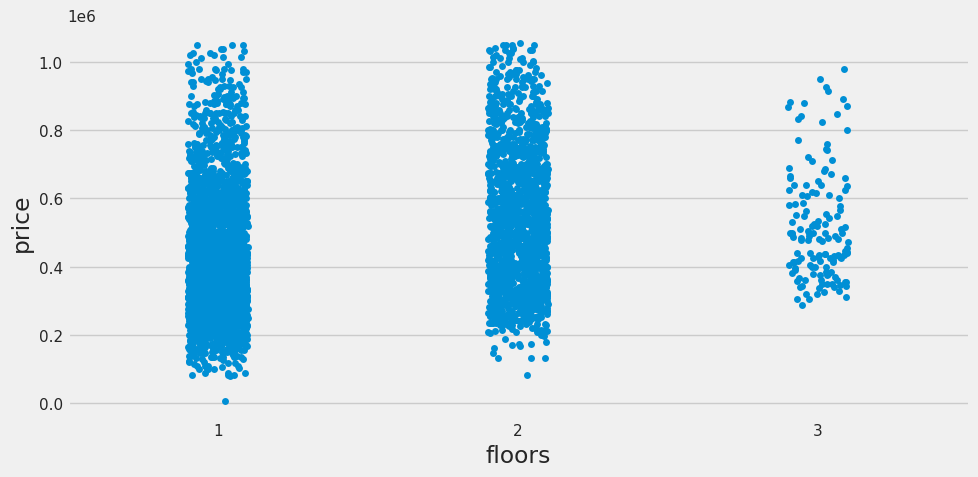

In [44]:
sns.catplot(x='floors', y='price', data=data, height=5, aspect=2)

- Let's check the attributes again

In [45]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,313000.0,3.0,1.50,1340,7912,1,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
2,342000.0,3.0,2.00,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,420000.0,3.0,2.25,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,550000.0,4.0,2.50,1940,10500,1,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,490000.0,2.0,1.00,880,6380,1,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA


### WaterFront

0    4177
1      14
Name: waterfront, dtype: int64


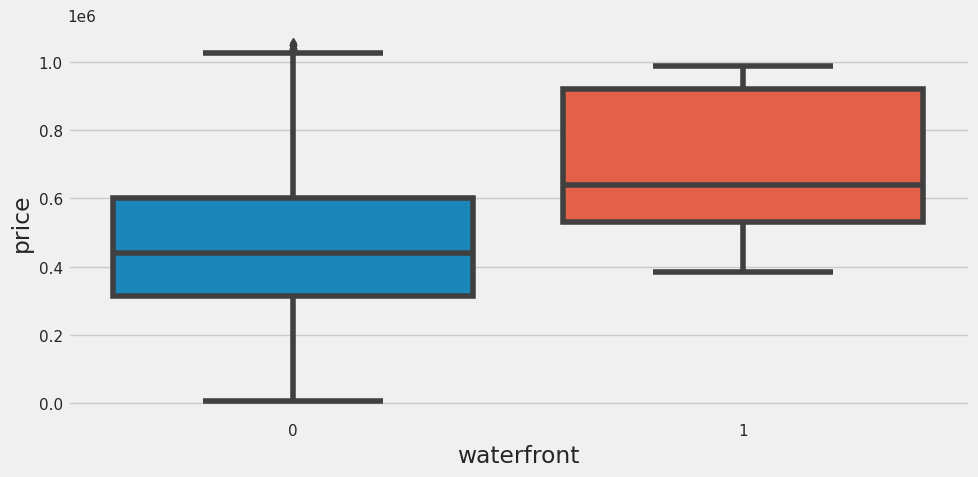

In [46]:
print(data.waterfront.value_counts())
sns.catplot(x='waterfront', y='price', data=data,
            kind='box', height=5, aspect=2)

### View

0    3896
2     156
3      63
1      49
4      27
Name: view, dtype: int64


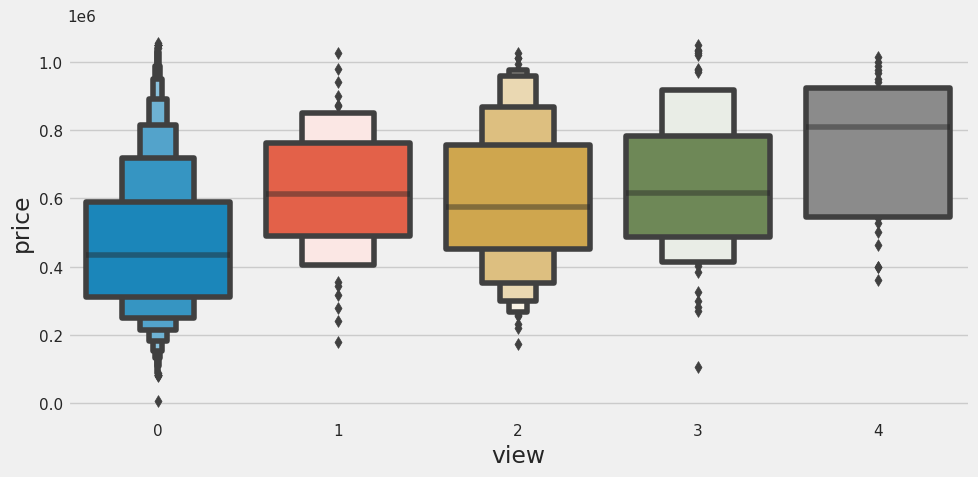

In [47]:
print(data.view.value_counts())
sns.catplot(x='view', y='price', data=data,
            kind='boxen', height=5, aspect=2)

### Condition

3    2626
4    1157
5     372
2      30
1       6
Name: condition, dtype: int64


<Axes: xlabel='condition', ylabel='price'>

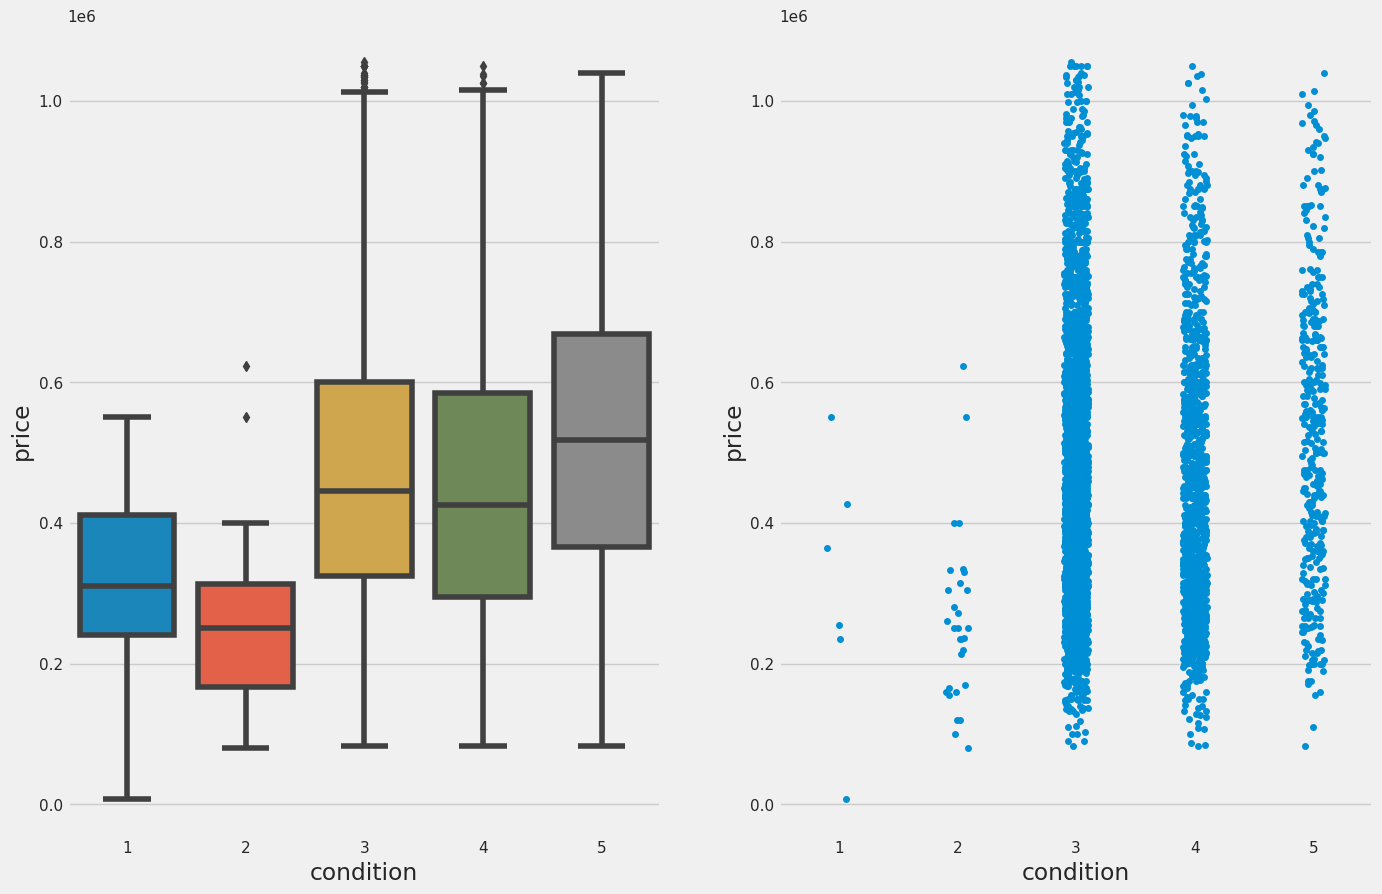

In [48]:
print(data.condition.value_counts())

fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(121)
sns.boxplot(x='condition', y='price', data=data, ax=ax1)

ax2 = fig.add_subplot(122)
sns.stripplot(x='condition', y='price', data=data, ax=ax2)

- Delete column with value = 1

In [49]:
mask_cond = data.condition > 1
data = data[mask_cond]

<Axes: xlabel='condition', ylabel='price'>

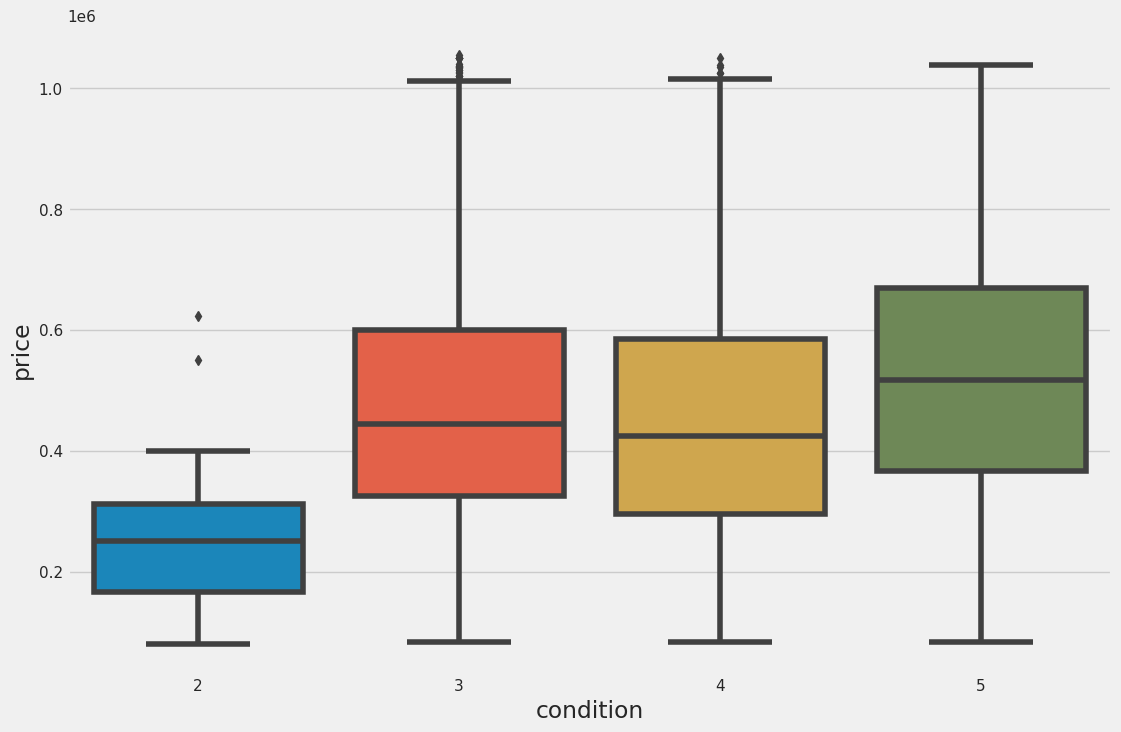

In [50]:
fig = plt.figure(figsize=(12, 8))
sns.boxplot(x='condition', y='price', data=data)

### Years: built and renovated

<Axes: xlabel='yr_built', ylabel='Count'>

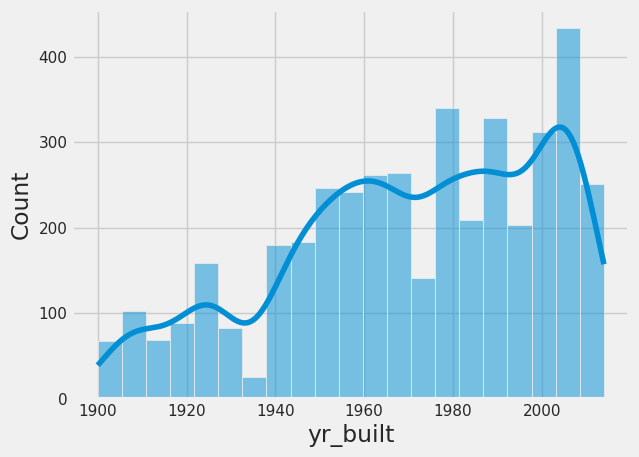

In [51]:
sns.histplot(data.yr_built, kde=True)

<Axes: xlabel='yr_renovated', ylabel='Count'>

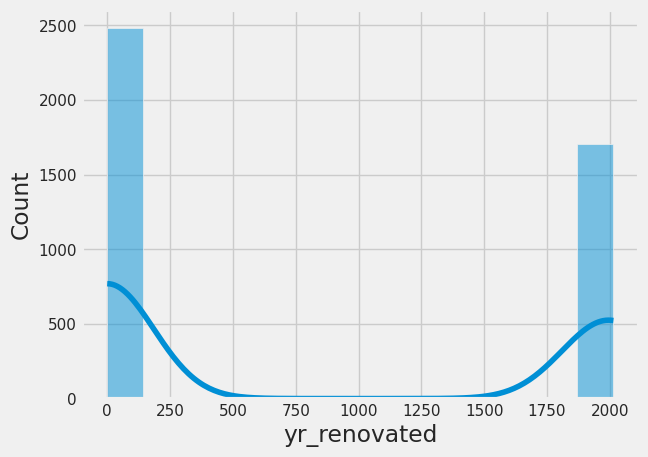

In [52]:
sns.histplot(data.yr_renovated, kde=True)

- If house is renovated, set the value is equal 1. Else is equal 0

In [53]:
data.yr_renovated = data.yr_renovated.apply(lambda x: 0 if x==0 else 1)

0    2481
1    1704
Name: yr_renovated, dtype: int64


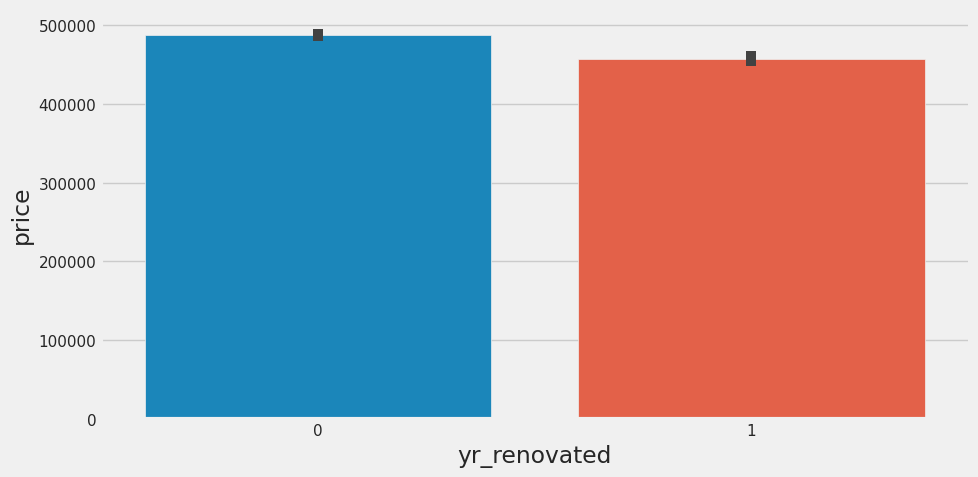

In [54]:
print(data.yr_renovated.value_counts())
sns.catplot(x='yr_renovated', y='price', data=data,
            kind='bar', height=5, aspect=2)

- Checking the data

In [55]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,313000.0,3.0,1.50,1340,7912,1,0,0,3,1340,0,1955,1,18810 Densmore Ave N,Shoreline,WA 98133,USA
2,342000.0,3.0,2.00,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,420000.0,3.0,2.25,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,550000.0,4.0,2.50,1940,10500,1,0,0,4,1140,800,1976,1,9105 170th Ave NE,Redmond,WA 98052,USA
5,490000.0,2.0,1.00,880,6380,1,0,0,3,880,0,1938,1,522 NE 88th St,Seattle,WA 98115,USA


### Location information
#### Street


In [56]:
data.street.value_counts()

2520 Mulberry Walk NE    4
2500 Mulberry Walk NE    3
513 N 46th St            2
5010 Greenwood Ave N     2
6520-6588 8th Ave NW     2
                        ..
1215 N 50th St           1
19311 59th Pl NE         1
34434 30th Ave SW        1
806 S 295th Pl           1
18717 SE 258th St        1
Name: street, Length: 4115, dtype: int64

- This will prevent finding the common pattern

In [57]:
data.drop('street', axis=1, inplace=True)

#### City

In [59]:
data.city.value_counts().head(10)

Seattle        1423
Renton          286
Redmond         220
Bellevue        213
Kent            183
Issaquah        173
Auburn          172
Kirkland        167
Sammamish       158
Federal Way     142
Name: city, dtype: int64

<Axes: ylabel='city'>

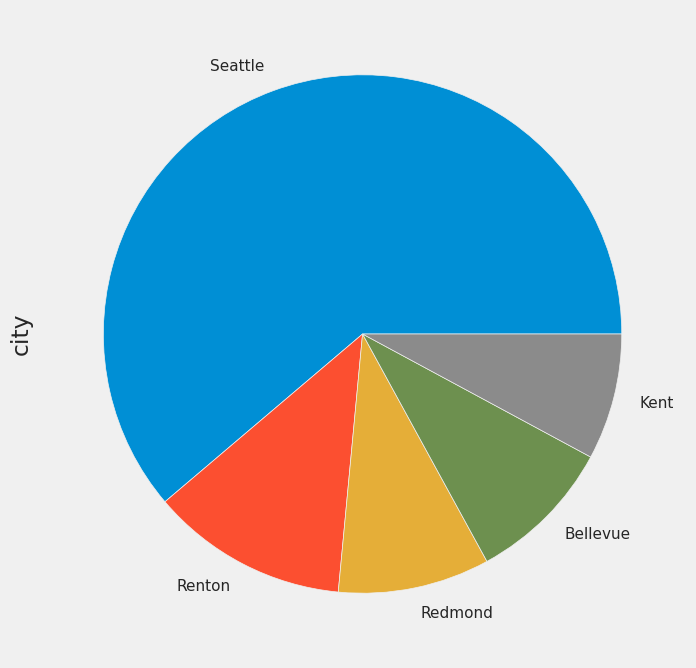

In [60]:
fig = plt.figure(figsize=(12, 8))
# Top 5 cities
data.city.value_counts().head(5).plot.pie()

#### State zip

In [61]:
print(data.statezip.nunique())
print(data.statezip.value_counts())

77
WA 98103    140
WA 98052    130
WA 98117    128
WA 98115    121
WA 98059    101
           ... 
WA 98288      3
WA 98050      2
WA 98354      2
WA 98068      1
WA 98039      1
Name: statezip, Length: 77, dtype: int64


In [62]:
data.drop('statezip', axis=1, inplace=True)

#### Country

<Axes: xlabel='country', ylabel='count'>

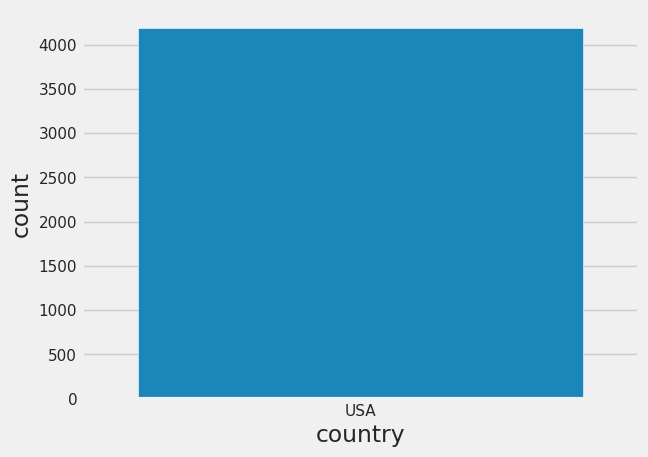

In [63]:
sns.countplot(x=data.country)

In [64]:
data.drop('country', axis=1, inplace=True)

- Checking the dataset

<Axes: >

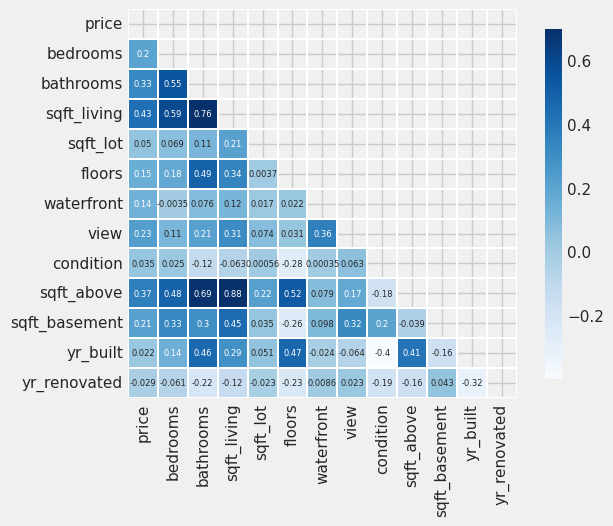

In [73]:
h_map = sns.heatmap(corr_data.corr(), linewidths=0.25, vmax=0.7, square=True,
                    mask=corr_mask, cmap='Blues', linecolor='w', annot=True,
                    annot_kws={"size":6}, cbar_kws={"shrink": .9})
h_map


In [74]:
print(data.shape)
data.head(3)

(4185, 14)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,313000.0,3.0,1.50,1340,7912,1,0,0,3,1340,0,1955,1,Shoreline
2,342000.0,3.0,2.00,1930,11947,1,0,0,4,1930,0,1966,0,Kent
3,420000.0,3.0,2.25,2000,8030,1,0,0,4,1000,1000,1963,0,Bellevue


### Prepare data for training

In [75]:
X = data.drop('price', axis=1)
y = data.price.astype(int)

### Scaler

In [76]:
# set up preprocessing numeric columns
imp_median = SimpleImputer(strategy='median', add_indicator=True)
scaler = StandardScaler()

In [77]:
# set up preprocessing categorical columns
imp_constant = SimpleImputer(strategy='constant')
ohe = OneHotEncoder(handle_unknown='ignore')

In [78]:
# select columns by datatype
num_cols = make_column_selector(dtype_include='number')
cat_cols = make_column_selector(dtype_exclude='number')

In [79]:
# do all preprocessing
preprocessor = make_column_transformer(
    (make_pipeline(imp_median, scaler), num_cols),
    (make_pipeline(imp_constant, ohe), cat_cols)
)

## Model Training and Visualisation

In [80]:
# create a pipeline
def pipeline_model(X, y, data):
    pipe = make_pipeline(preprocessor, LinearRegression())

    print(cross_val_score(pipe, X, y).mean())

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                        random_state=32)

    pipe.fit(X_train, y_train)

    predict = pipe.predict(X_test)
    print(f'MSE             : {metrics.mean_squared_error(y_test, predict)}\n'
          f'\nRMSE            : '
          f'{np.sqrt(metrics.mean_squared_error(y_test, predict))}\n'
          f'MAE             : {metrics.mean_absolute_error(y_test, predict)}\n'
          #f'Mean abs % error: '
          #f'{metrics.mean_absolute_percentage_error(y_test, predict)}\n'
          f'\n'
          f'Score (train)   : {pipe.score(X_train, y_train)}\n'
          f'Score (test)    : {pipe.score(X_test, y_test)}\n')
    comparison_of_results(X_test, y_test, pipe)
    visualize_model_results(data, pipe)

def comparison_of_results(X_test, y_test, model, times=5):
    for i in range(times):
        rnd = np.random.randint(0, y_test.shape[0] - 1)
        real = y_test.iloc[rnd]
        pred = int(model.predict(X_test.iloc[rnd].to_frame().T)[0])
        print(f'Real Value      ----->>>>> {real} $\n'
              f'Predicted Value ----->>>>> {pred} $')
        print()


def visualize_model_results(data, model):
    fig = plt.figure(figsize=(17, 10))
    data = data.sort_values(by=['price'])
    X = data.drop('price', axis=1)
    y = data.price.astype(int)
    
    plt.scatter(range(X.shape[0]), y, color='red', label='Real')
    plt.scatter(range(X.shape[0]), model.predict(X), marker='.', label='Predict')

    plt.legend(loc=2, prop={'size': 25})

0.6723690960724055
MSE             : 12385825660.9136

RMSE            : 111291.62439695811
MAE             : 80985.11330965646

Score (train)   : 0.687331910997002
Score (test)    : 0.7057545627817641

Real Value      ----->>>>> 618080 $
Predicted Value ----->>>>> 543371 $

Real Value      ----->>>>> 392000 $
Predicted Value ----->>>>> 489386 $

Real Value      ----->>>>> 329900 $
Predicted Value ----->>>>> 359717 $

Real Value      ----->>>>> 489200 $
Predicted Value ----->>>>> 616888 $

Real Value      ----->>>>> 450000 $
Predicted Value ----->>>>> 550164 $



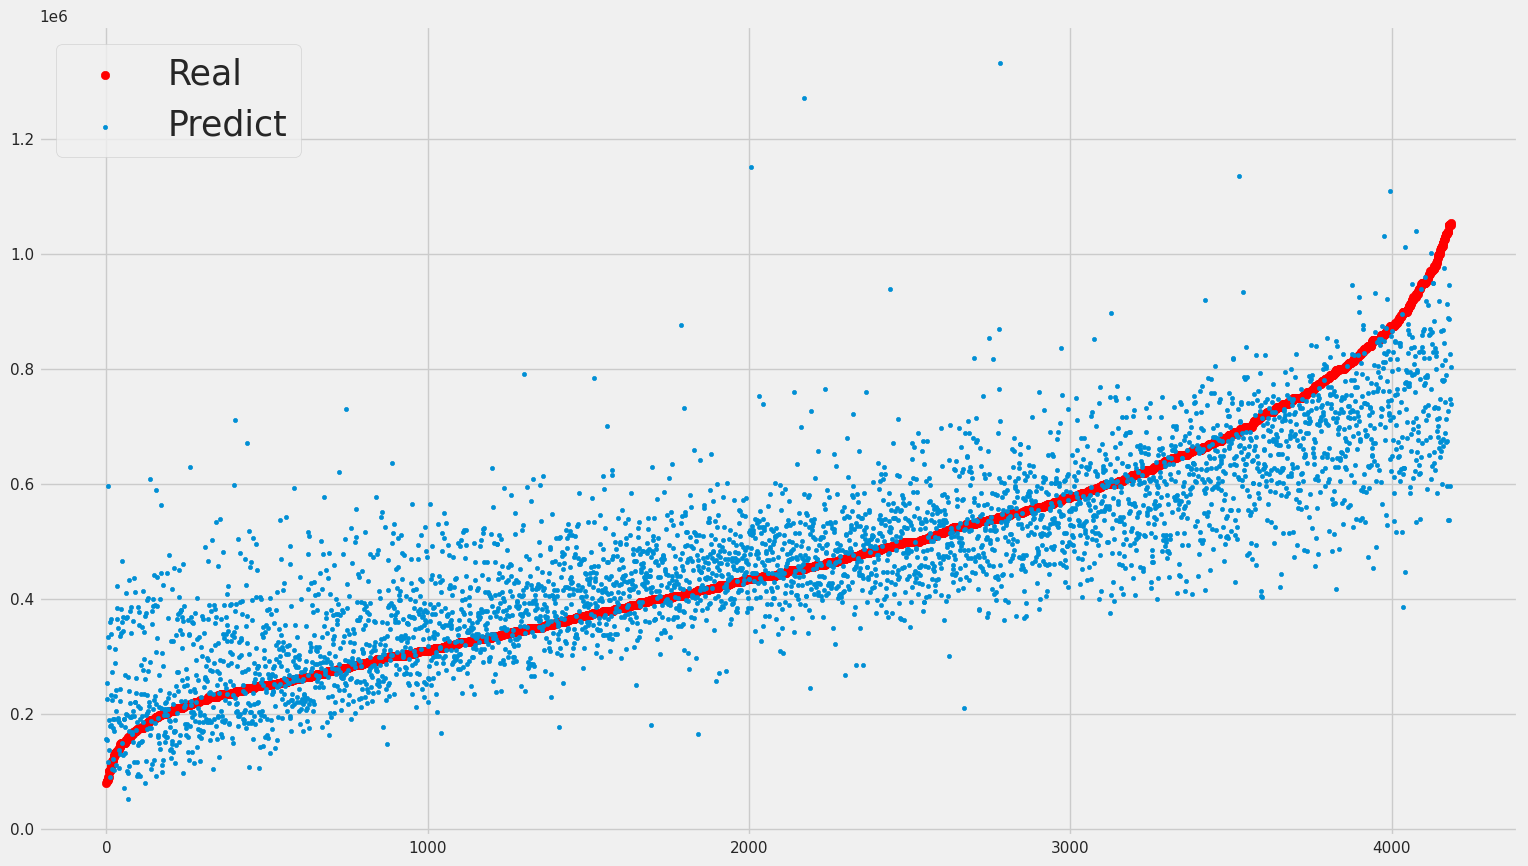

In [81]:
pipeline_model(X, y, data)